In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
FPATH = '.../events_level_1.csv'  # uzupełnij ścieżkę do pliku

In [3]:
df = pd.read_csv(FPATH)

In [4]:
df.head()

,event_type,product_id,category_id,price,user_id,user_session,datetime
0,view,1996170,2144415922528452715,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24 11:57:06+00:00
1,view,139905,2144415926932472027,17.16,1515915625519380411,tdicluNnRY,2020-09-24 11:57:26+00:00
2,view,215454,2144415927158964449,9.81,1515915625513238515,4TMArHtXQy,2020-09-24 11:57:27+00:00
3,view,635807,2144415923107266682,113.81,1515915625519014356,aGFYrNgC08,2020-09-24 11:57:33+00:00
4,view,3658723,2144415921169498184,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24 11:57:36+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884474 entries, 0 to 884473
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_type    884474 non-null  object 
 1   product_id    884474 non-null  int64  
 2   category_id   884474 non-null  int64  
 3   price         884474 non-null  float64
 4   user_id       884474 non-null  int64  
 5   user_session  884312 non-null  object 
 6   datetime      884474 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 47.2+ MB


In [6]:
df['datetime'].dtype

dtype('O')

In [7]:
df['datetime'].iloc[0]

'2020-09-24 11:57:06+00:00'

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S+00:00')

In [9]:
df.head()

,event_type,product_id,category_id,price,user_id,user_session,datetime
0,view,1996170,2144415922528452715,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24 11:57:06
1,view,139905,2144415926932472027,17.16,1515915625519380411,tdicluNnRY,2020-09-24 11:57:26
2,view,215454,2144415927158964449,9.81,1515915625513238515,4TMArHtXQy,2020-09-24 11:57:27
3,view,635807,2144415923107266682,113.81,1515915625519014356,aGFYrNgC08,2020-09-24 11:57:33
4,view,3658723,2144415921169498184,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24 11:57:36


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884474 entries, 0 to 884473
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_type    884474 non-null  object        
 1   product_id    884474 non-null  int64         
 2   category_id   884474 non-null  int64         
 3   price         884474 non-null  float64       
 4   user_id       884474 non-null  int64         
 5   user_session  884312 non-null  object        
 6   datetime      884474 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 47.2+ MB


In [11]:
df['user_id'] = df['user_id'].astype('category')
df['product_id'] = df['product_id'].astype('category')
df['category_id'] = df['category_id'].astype('category')

# Krok 1: Wyprowadzenie dodatkowych cech czasu

- data
- dzień tygodnia

In [12]:
df['date'] = df['datetime'].dt.date

In [13]:
df['dayofweek'] = df['datetime'].dt.dayofweek

In [14]:
df.head()

,event_type,product_id,category_id,price,user_id,user_session,datetime,date,dayofweek
0,view,1996170,2144415922528452715,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24 11:57:06,2020-09-24,3
1,view,139905,2144415926932472027,17.16,1515915625519380411,tdicluNnRY,2020-09-24 11:57:26,2020-09-24,3
2,view,215454,2144415927158964449,9.81,1515915625513238515,4TMArHtXQy,2020-09-24 11:57:27,2020-09-24,3
3,view,635807,2144415923107266682,113.81,1515915625519014356,aGFYrNgC08,2020-09-24 11:57:33,2020-09-24,3
4,view,3658723,2144415921169498184,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24 11:57:36,2020-09-24,3


# Krok 2: wartość sprzedanych produktów w czasie

- jak określić sprzedaż?
- agregacja
- sortowanie
- wykres sprzedaży

In [15]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [16]:
purchases = df[df['event_type'] == 'purchase']  # SELECT * FROM df WHERE event_type = 'purchase'

In [17]:
len(purchases) / len(df)

0.04222057403609377

In [18]:
agg_purchases = purchases[['price', 'date']].groupby('date').sum()
agg_purchases

,price
date,
2020-09-24,9563.67
2020-09-25,13025.72
2020-09-26,11821.97
2020-09-27,7910.53
2020-09-28,15120.82
...,...
2021-02-24,43883.95
2021-02-25,61550.13
2021-02-26,50637.70


In [19]:
agg_purchases.sort_index(inplace=True)

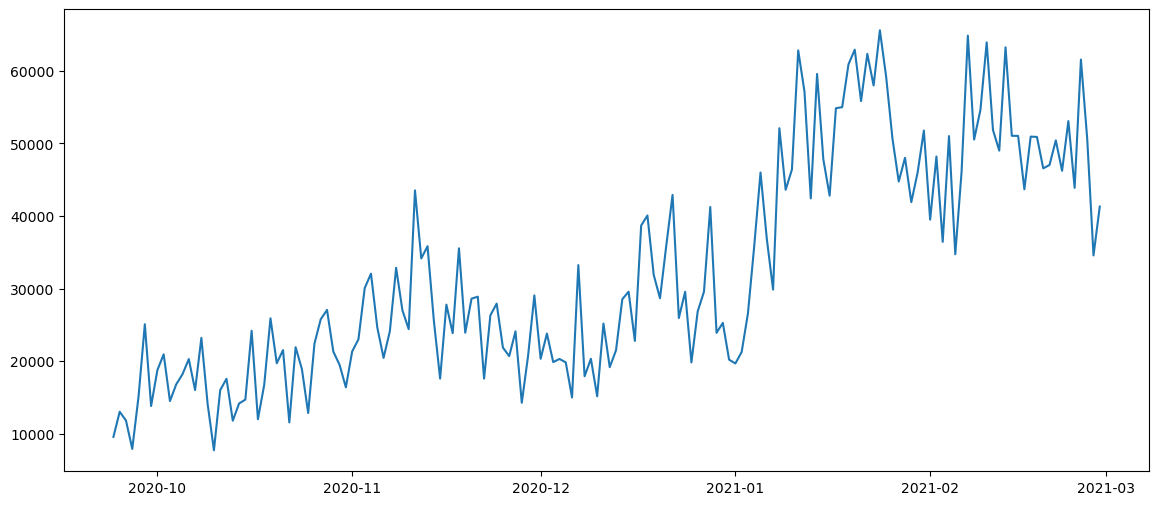

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(agg_purchases)
plt.show()

In [21]:
# A jak się ma wartość produktów dodanych do koszyka do wartości sprzedaży?

In [22]:
cart = df[df['event_type'] == 'cart']
agg_cart = cart[['price', 'date']].groupby('date').sum()

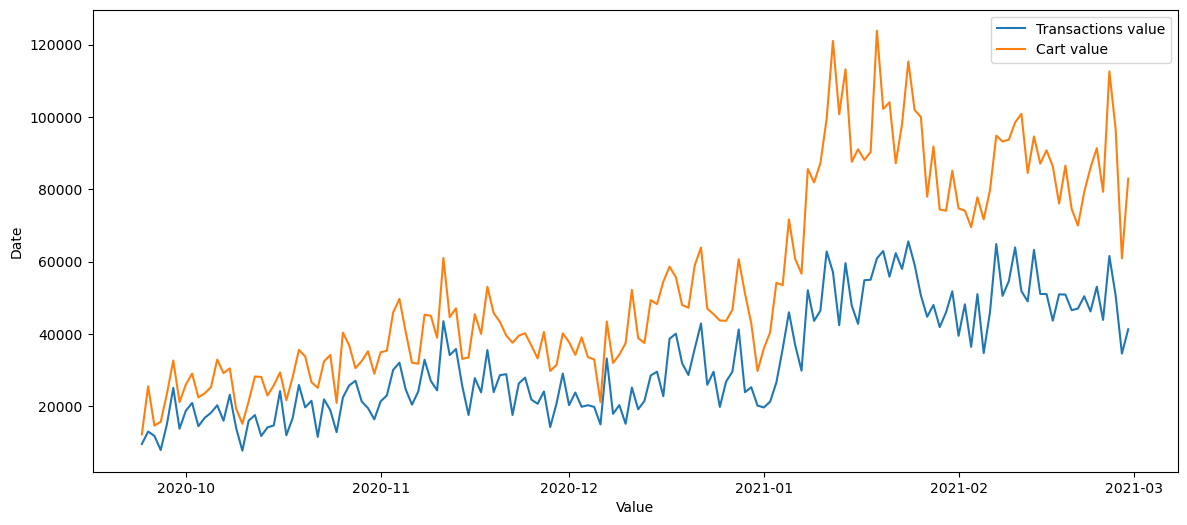

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(agg_purchases)
plt.plot(agg_cart)
plt.legend(['Transactions value', 'Cart value'])
plt.xlabel('Value')
plt.ylabel('Date')
plt.show()

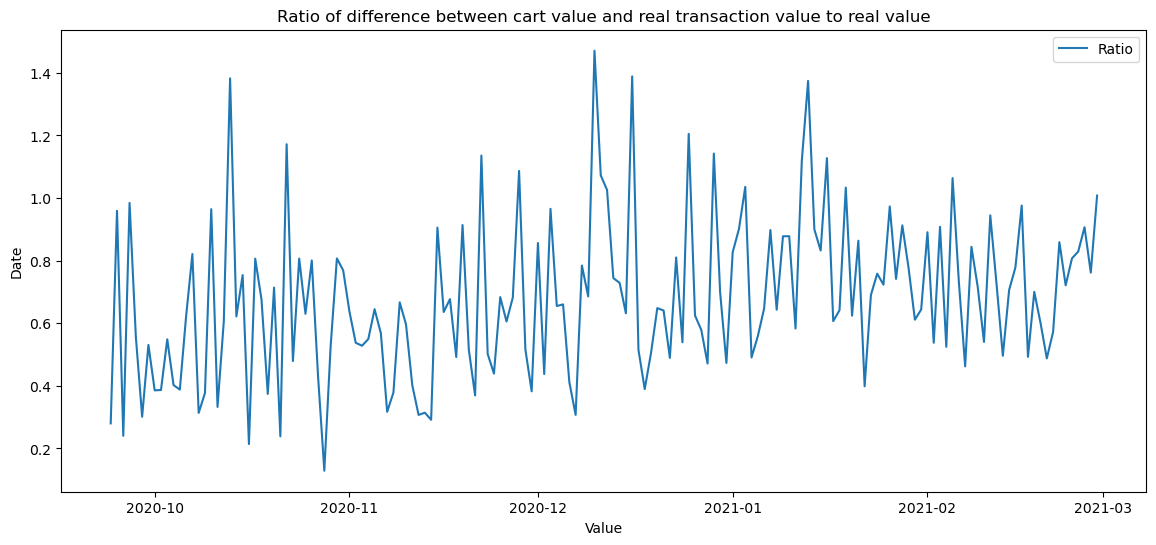

In [24]:
# Stosunek różnicy wartości produktów dodanych do koszyka i produktów sprzedanych
# do produktów sprzedanych

plt.figure(figsize=(14, 6))
plt.plot((agg_cart - agg_purchases) / agg_purchases)
plt.title('Ratio of difference between cart value and real transaction value to real value')
plt.legend(['Ratio'])
plt.xlabel('Value')
plt.ylabel('Date')
plt.show()

# Krok 3: Dzień tygodnia a liczba zdarzeń

- liczba użytkowników na dzień tygodnia

In [25]:
users_per_day = df[['dayofweek', 'user_id']].groupby('dayofweek').count()

In [26]:
users_per_day

,user_id
dayofweek,
0,133738
1,130302
2,127799
3,126208
4,125657
5,117494
6,123276


In [27]:
n_users_per_day = df[['dayofweek', 'user_id']].groupby('dayofweek').nunique()

In [28]:
n_users_per_day

,user_id
dayofweek,
0,68169
1,66369
2,65796
3,65259
4,65615
5,60066
6,62613


In [29]:
# Połącz wyniki

In [30]:
users_per_day.columns = ['value']
users_per_day['count'] = 'total'

In [31]:
users_per_day.head()

,value,count
dayofweek,,
0,133738,total
1,130302,total
2,127799,total
3,126208,total
4,125657,total


In [32]:
n_users_per_day.columns = ['value']
n_users_per_day['count'] = 'nunique'
n_users_per_day.head()

,value,count
dayofweek,,
0,68169,nunique
1,66369,nunique
2,65796,nunique
3,65259,nunique
4,65615,nunique


In [33]:
users_per_day.reset_index(inplace=True)
users_per_day.head()

,dayofweek,value,count
0,0,133738,total
1,1,130302,total
2,2,127799,total
3,3,126208,total
4,4,125657,total


In [34]:
n_users_per_day.reset_index(inplace=True)

In [35]:
users_daily = pd.concat([users_per_day, n_users_per_day], ignore_index=True)
users_daily.head()

,dayofweek,value,count
0,0,133738,total
1,1,130302,total
2,2,127799,total
3,3,126208,total
4,4,125657,total


In [36]:
users_daily.tail()

,dayofweek,value,count
9,2,65796,nunique
10,3,65259,nunique
11,4,65615,nunique
12,5,60066,nunique
13,6,62613,nunique


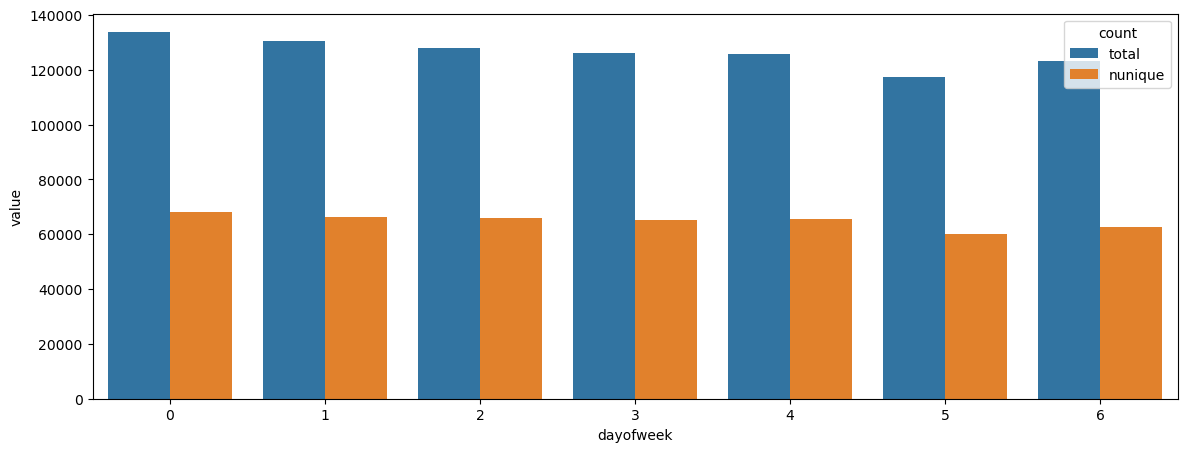

In [37]:
plt.figure(figsize=(14, 5))
sns.barplot(users_daily, x='dayofweek', y='value', hue='count')
plt.show()

# Krok 4: Sesje

- Liczba sesji na użytkownika
- Czasy trwania sesji

In [38]:
sessions_per_user = df[['user_id', 'user_session']].groupby('user_id').count()

/tmp/ipykernel_7004/2437566297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sessions_per_user = df[['user_id', 'user_session']].groupby('user_id').count()


<Axes: >

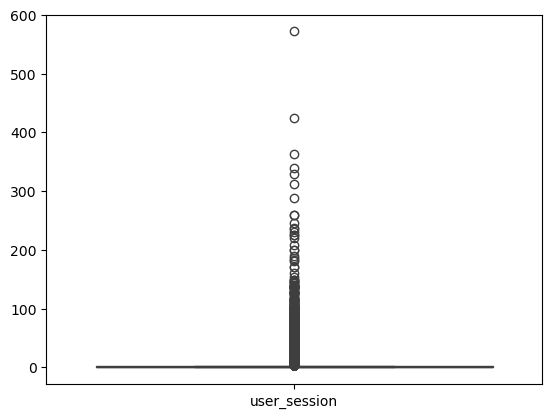

In [39]:
sns.boxplot(sessions_per_user)

In [40]:
sessions_per_user.max()

user_session    572
dtype: int64

In [41]:
sessions_per_user.sort_values(by='user_session').head()

,user_session
user_id,
1515915625598706843,0
1515915625567137589,0
1515915625553204661,0
1515915625545469004,0
1515915625528940165,0


In [42]:
sessions_per_user.sort_values(by='user_session', ascending=False).head()

,user_session
user_id,
1515915625554995474,572
1515915625527763086,424
1515915625591251010,363
1515915625591659523,339
1515915625537803839,329


In [43]:
df[df['user_id'] == 1515915625554995474]

,event_type,product_id,category_id,price,user_id,user_session,datetime,date,dayofweek
410028,view,3979136,2144415923744800906,297.19,1515915625554995474,nFlhu5QzOd,2020-12-08 06:13:31,2020-12-08,1
410029,view,3979025,2144415923744800906,350.60,1515915625554995474,nFlhu5QzOd,2020-12-08 06:13:38,2020-12-08,1
410030,view,3978887,2144415923744800906,369.17,1515915625554995474,nFlhu5QzOd,2020-12-08 06:13:45,2020-12-08,1
410099,view,483337,2144415923744800906,365.25,1515915625554995474,nFlhu5QzOd,2020-12-08 06:36:13,2020-12-08,1
410100,view,669304,2144415923744800906,478.59,1515915625554995474,nFlhu5QzOd,2020-12-08 06:36:27,2020-12-08,1
...,...,...,...,...,...,...,...,...,...
825008,view,247085,2144415923744800906,262.48,1515915625554995474,nFlhu5QzOd,2021-02-18 07:48:51,2021-02-18,3
825081,view,483337,2144415923744800906,365.25,1515915625554995474,nFlhu5QzOd,2021-02-18 07:59:38,2021-02-18,3
825082,view,847412,2144415923744800906,120.00,1515915625554995474,nFlhu5QzOd,2021-02-18 07:59:43,2021-02-18,3
825083,view,37774,2144415923744800906,167.62,1515915625554995474,nFlhu5QzOd,2021-02-18 07:59:47,2021-02-18,3


<Axes: >

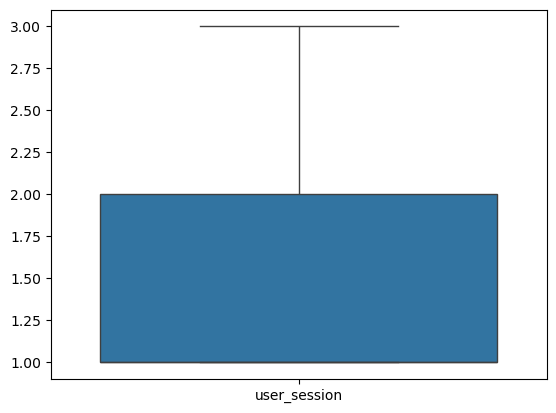

In [44]:
sns.boxplot(sessions_per_user[sessions_per_user > 0], showfliers=False)

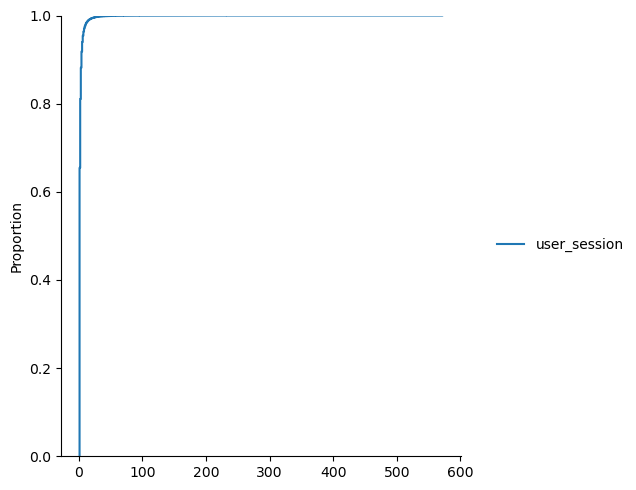

In [45]:
sns.displot(sessions_per_user[sessions_per_user > 0], kind='ecdf')

In [46]:
sessions_per_user.describe()

,user_session
count,407283.000000
mean,2.171247
std,4.405389
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,572.000000


In [47]:
# Czas trwania sesji

In [48]:
session_min_times = df[['user_session', 'datetime']].groupby('user_session')['datetime'].min()
session_min_times.head()

user_session
000AMhYaQu                             2021-01-31 20:27:14
000c34fa-991f-442a-8e07-8c472269bec6   2020-09-30 17:52:02
001HttdHUk                             2021-01-09 23:35:49
001P7lK0Pt                             2020-11-06 01:25:30
001RxUtFJa                             2020-12-29 04:50:33
Name: datetime, dtype: datetime64[ns]

In [49]:
session_max_times = df[['user_session', 'datetime']].groupby('user_session')['datetime'].max()
session_max_times.head()

user_session
000AMhYaQu                             2021-01-31 20:27:14
000c34fa-991f-442a-8e07-8c472269bec6   2020-09-30 17:52:02
001HttdHUk                             2021-01-09 23:35:49
001P7lK0Pt                             2020-11-06 01:25:43
001RxUtFJa                             2020-12-29 04:50:33
Name: datetime, dtype: datetime64[ns]

In [51]:
total_session_times = session_max_times - session_min_times
total_session_times.head()

user_session
000AMhYaQu                             0 days 00:00:00
000c34fa-991f-442a-8e07-8c472269bec6   0 days 00:00:00
001HttdHUk                             0 days 00:00:00
001P7lK0Pt                             0 days 00:00:13
001RxUtFJa                             0 days 00:00:00
Name: datetime, dtype: timedelta64[ns]

In [52]:
total_session_times = (session_max_times - session_min_times).dt.total_seconds()
total_session_times.head()

user_session
000AMhYaQu                               0.0
000c34fa-991f-442a-8e07-8c472269bec6     0.0
001HttdHUk                               0.0
001P7lK0Pt                              13.0
001RxUtFJa                               0.0
Name: datetime, dtype: float64

In [53]:
len(total_session_times[total_session_times == 0]) / len(total_session_times)

0.7138263206619929

In [54]:
sdf = df[df['user_session'].isin(total_session_times[total_session_times == 0].index)]

In [55]:
sdf['event_type'].value_counts()

event_type
view        348475
purchase      1888
cart            20
Name: count, dtype: int64

In [56]:
total_session_times.describe()

count    4.903980e+05
mean     2.522750e+04
std      2.987723e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+01
max      1.339442e+07
Name: datetime, dtype: float64

In [57]:
total_session_times[total_session_times > 0].describe()

count    1.403390e+05
mean     8.815451e+04
std      5.535159e+05
min      1.000000e+00
25%      6.500000e+01
50%      2.240000e+02
75%      1.236000e+03
max      1.339442e+07
Name: datetime, dtype: float64

# Krok 5: Wytypowanie użytkowników którzy mieli co najmniej 3 interakcje z produktami

In [58]:
users_with_interactions = df[['user_id', 'product_id']].groupby('user_id').count()['product_id']
users_with_interactions.head()

/tmp/ipykernel_7004/2549993431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users_with_interactions = df[['user_id', 'product_id']].groupby('user_id').count()['product_id']


user_id
1515915625353226922     1
1515915625353230067     1
1515915625353230683    13
1515915625353230922     1
1515915625353234047    36
Name: product_id, dtype: int64

In [59]:
len(users_with_interactions[users_with_interactions >= 3])

77078

In [60]:
indexes = users_with_interactions[users_with_interactions >= 3].index

In [61]:
indexes[0]

1515915625353230683

In [62]:
ndf = df[df['user_id'].isin(indexes)]

In [63]:
len(ndf) / len(df)

0.5546087278992938

In [64]:
ndf.head()

,event_type,product_id,category_id,price,user_id,user_session,datetime,date,dayofweek
1,view,139905,2144415926932472027,17.16,1515915625519380411,tdicluNnRY,2020-09-24 11:57:26,2020-09-24,3
8,view,657859,2144415939431498289,34.17,1515915625519320570,HEl15U7JVy,2020-09-24 11:58:25,2020-09-24,3
10,view,811491,2144415926370435276,33.32,1515915625356205647,aFLc6y9kn4,2020-09-24 11:58:34,2020-09-24,3
11,view,811491,2144415926370435276,33.32,1515915625356205647,aFLc6y9kn4,2020-09-24 11:58:54,2020-09-24,3
17,view,523117,2144415924491387038,73.81,1515915625519334445,HycmCUvnFr,2020-09-24 12:00:33,2020-09-24,3


In [65]:
ndf = ndf[['category_id', 'user_id', 'datetime']]

In [66]:
ndf['ts'] = ndf['datetime'].values.astype(np.int64) // 10 ** 9

In [67]:
ndf.head()

,category_id,user_id,datetime,ts
1,2144415926932472027,1515915625519380411,2020-09-24 11:57:26,1600948646
8,2144415939431498289,1515915625519320570,2020-09-24 11:58:25,1600948705
10,2144415926370435276,1515915625356205647,2020-09-24 11:58:34,1600948714
11,2144415926370435276,1515915625356205647,2020-09-24 11:58:54,1600948734
17,2144415924491387038,1515915625519334445,2020-09-24 12:00:33,1600948833


In [68]:
ndf = ndf[['category_id', 'user_id', 'ts']]

In [ ]:
NEW_FNAME = '.../recommender_input.csv'  # uzupełnij ścieżkę do pliku!

In [ ]:
ndf.to_csv(NEW_FNAME, index=False)